In [1]:
!git clone https://github.com/pjreddie/darknet.git
%cd darknet
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!cat Makefile
!make

Cloning into 'darknet'...
remote: Enumerating objects: 5907, done.
remote: Total 5907 (delta 0), reused 0 (delta 0), pack-reused 5907
Receiving objects: 100% (5907/5907), 6.32 MiB | 3.13 MiB/s, done.
Resolving deltas: 100% (3923/3923), done.
/content/darknet
GPU=1
CUDNN=1
OPENCV=1
OPENMP=0
DEBUG=0

ARCH= -gencode arch=compute_30,code=sm_30 \
      -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52]
#      -gencode arch=compute_20,code=[sm_20,sm_21] \ This one is deprecated?

# This is what I use, uncomment if you know your arch and want to specify
# ARCH= -gencode arch=compute_52,code=compute_52

VPATH=./src/:./examples
SLIB=libdarknet.so
ALIB=libdarknet.a
EXEC=darknet
OBJDIR=./obj/

CC=gcc
CPP=g++
NVCC=nvcc 
AR=ar
ARFLAGS=rcs
OPTS=-Ofast
LDFLAGS= -lm -pthread 
COMMON= -Iinclude/ -Isrc/
CFLAGS=-Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC

ifeq ($(OPENMP), 1) 
CFLAGS+=

In [7]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-06-16 10:26:53--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   166KB/s    in 38m 19s 

2020-06-16 11:05:14 (105 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [8]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg -dont-show

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

In [0]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

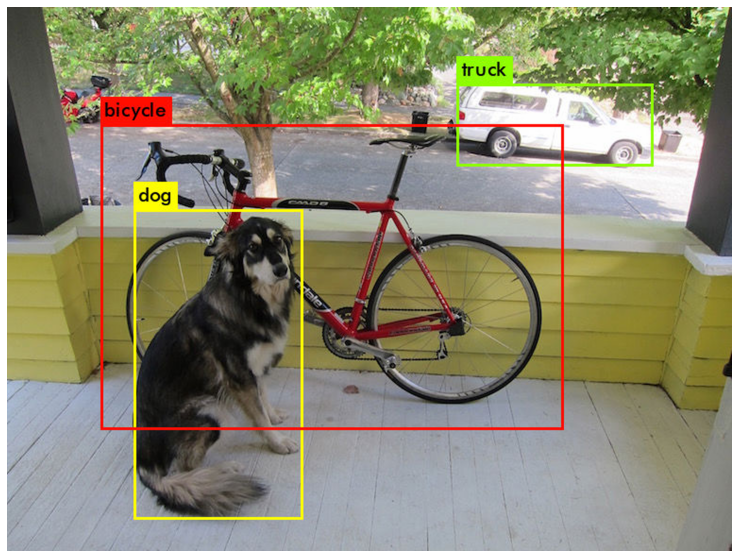

In [12]:
imShow('predictions.jpg')